In [1]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


### 1. Load and explore data 💾

#### Column information
- `id`: Identificador único de la propiedad.
- `log_price`: El precio del alquiler de la propiedad en formato de registro. VARIABLE A PREDECIR
- `property_type`: Tipo de propiedad (ej. apartamento, casa, etc.).
- `room_type`: Tipo de habitación (ej. habitación privada, casa/apartamento completo, etc.).
- `amenities`: Comodidades ofrecidas en la propiedad.
- `accommodates`: Número máximo de huéspedes que la propiedad puede acomodar.
- `bathrooms`: Número de baños en la propiedad.
- `bed_type`: Tipo de cama (ej. cama matrimonial, sofá cama, etc.).
- `cancellation_policy`: Política de cancelación para reservas.
- `cleaning_fee`: Si se cobra una tarifa de limpieza (True/False).
- `city`: Ciudad donde se encuentra la propiedad.
- `description`: Descripción de la propiedad.
- `first_review`: Fecha de la primera revisión.
- `host_has_profile_pic`: Si el anfitrión tiene una foto de perfil (True/False).
- `host_identity_verified`: Si la identidad del anfitrión está verificada (True/False).
- `host_response_rate`: Tasa de respuesta del anfitrión.
- `host_since`: Fecha en que el anfitrión se unió a Airbnb.
- `instant_bookable`: Si la propiedad puede ser reservada instantáneamente (True/False).
- `last_review`: Fecha de la última revisión.
- `latitude`: Latitud geográfica de la propiedad.
- `longitude`: Longitud geográfica de la propiedad.
- `name`: Nombre de la propiedad.
- `neighbourhood`: Barrio donde se encuentra la propiedad.
- `number_of_reviews`: Número total de revisiones de la propiedad.
- `review_scores_rating`: Puntuación general de las revisiones.
- `thumbnail_url`: URL de la miniatura de la propiedad.
- `zipcode`: Código postal de la propiedad.
- `bedrooms`: Número de dormitorios en la propiedad.
- `beds`: Número de camas en la propiedad.

In [2]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
test_data.shape, train_data.shape

((14823, 28), (59288, 29))

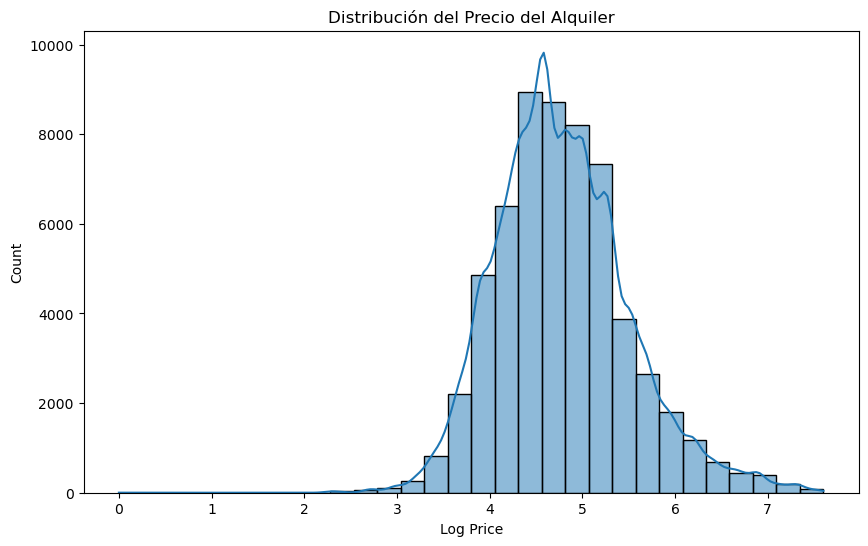

In [4]:
# Visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(train_data['log_price'], bins=30, kde=True)
plt.title('Distribución del Precio del Alquiler')
plt.xlabel('Log Price')
plt.show()

### 2. Null handling

In [5]:
train_data.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   149
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              12687
host_has_profile_pic        140
host_identity_verified      140
host_response_rate        14628
host_since                  140
instant_bookable              0
last_review               12660
latitude                      0
longitude                     0
name                          0
neighbourhood              5523
number_of_reviews             0
review_scores_rating      13366
thumbnail_url              6622
zipcode                     755
bedrooms                     77
beds                        100
dtype: int64

In [6]:
# Drop columns with a high number of missing values or those not relevant for now
train_data = train_data.drop(['first_review', 'host_response_rate', 'last_review', 
                              'review_scores_rating', 'thumbnail_url', 'neighbourhood'], axis=1)

train_data.isna().sum()

id                          0
log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                 149
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
host_has_profile_pic      140
host_identity_verified    140
host_since                140
instant_bookable            0
latitude                    0
longitude                   0
name                        0
number_of_reviews           0
zipcode                   755
bedrooms                   77
beds                      100
dtype: int64

### 3. Coding of categorical variables and scaling of numerical features

In [7]:
numeric_features = ['accommodates', 'bathrooms', 'latitude', 'longitude', 'bedrooms', 'beds']
categorical_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

### 4. Create  and apply transformers

In [8]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
train_data['amenities'].head()

0    {TV,Internet,"Wireless Internet","Air conditio...
1    {Internet,"Wireless Internet","Air conditionin...
2    {"Wireless Internet","Air conditioning","Wheel...
3    {Internet,"Wireless Internet","Air conditionin...
4    {TV,"Wireless Internet","Air conditioning",Kit...
Name: amenities, dtype: object

In [10]:
# Create a new column called 'num_amenities' based on the existing 'amenities' column.
train_data['num_amenities'] = train_data['amenities'].apply(lambda x: len(x.split(',')))

In [11]:
# Split the train dataframe for tts
X = train_data.drop('log_price', axis=1)
y = train_data['log_price']
X_train, X_val, y_train, y_val = tts(X, y, test_size=0.2, random_state=42)

In [12]:
# Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [13]:
# Pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [14]:
# Train the model
# pipeline.fit(X_train, y_train)